## Airbnb has empowered travelers and hosts alike, offering an array of unique and personalized ways to explore the world. 
### The dataset contains information from the Airbnb NYC dataset, comprising 48,895 rows and 16 columns.

In [1]:
# Importing necessary libraries for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading the Airbnb NYC dataset
data=pd.read_csv("C:\\Users\\Windows 10\\Downloads\\Airbnb NYC 2019.csv")

In [3]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Problem Statement
## 1.What insights can we gain about various hosts and areas?
## 2.What we learn from room type and their prices according to area?
## 3.Which hosts are the busiest ?
## 4..What is the correlation between different variables ?
## 5.Which Hosts are charging higher price?
## 6.What is the total room count for each room type in NYC based on the listings?

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
# Removing 'id' and 'last_review' columns from the dataset
data.drop(['id', 'last_review'], axis=1, inplace=True)
data.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [8]:
# Filling missing values in the 'reviews_per_month' column with 0
data.fillna({'reviews_per_month':0}, inplace=True)
data.reviews_per_month.isnull().sum()

0

In [9]:
data.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

## Host having highest listing count

In [10]:
# Grouping the data by 'host_name' and 'neighbourhood_group', and finding the maximum calculated_host_listings_count
top_hosts = data.groupby(['host_name', 'neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
top_hosts_sorted = top_hosts.sort_values(by='calculated_host_listings_count', ascending=False)
top_hosts_sorted.head(5)

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1834,Blueground,Manhattan,232
1833,Blueground,Brooklyn,232
7275,Kara,Manhattan,121
7480,Kazuya,Queens,103


### Sonder and Blueground are the top hosts with the highest number of listings in Manhattan and Brooklyn, respectively.

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_16372\2195722393.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr(method='kendall')


Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

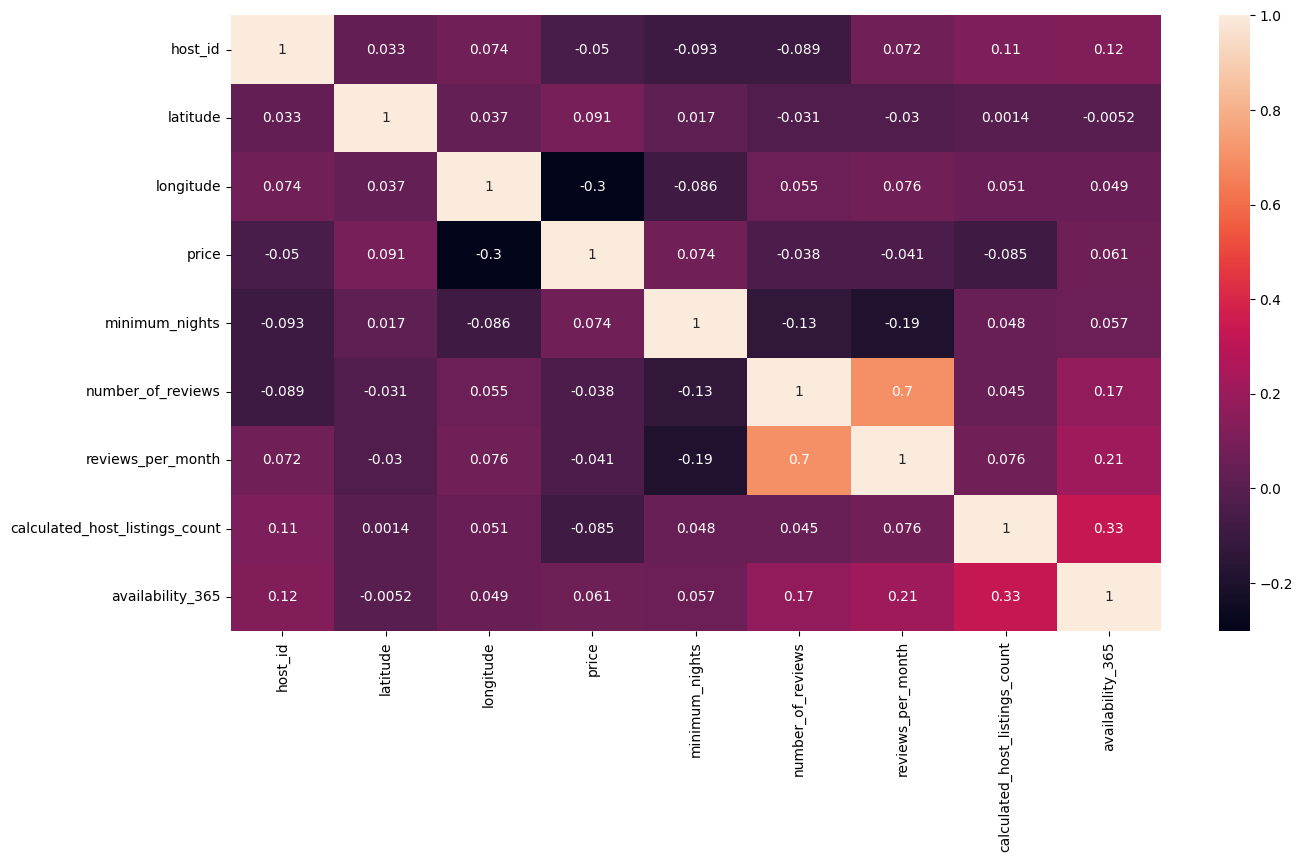

In [11]:
corr = data.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
data.columns

### With a correlation coefficient of 0.7, the number of reviews and reviews per month are strongly related, showing that properties attracting more reviews tend to have a higher rate of receiving reviews each month.

## Average Price Of Neighbourhood Groups

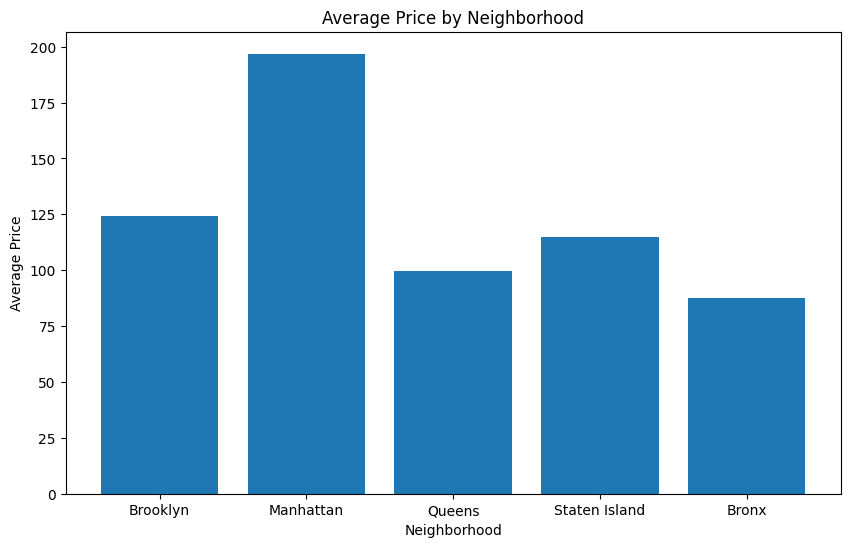

In [12]:
neighborhoods = ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
price_list_by_n = []

for neighborhood in neighborhoods:
    sub = data.loc[data['neighbourhood_group'] == neighborhood]
    price_sub = sub['price']
    price_list_by_n.append(price_sub)

plt.figure(figsize=(10, 6))
plt.bar(neighborhoods, [price.mean() for price in price_list_by_n])

#Creating a bar plot showing the average price for each neighborhood
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.title('Average Price by Neighborhood')

plt.show()

## Prices are generally higher in the **Manhattan**  than Brooklyn and Staten Island

## Most used Room Types

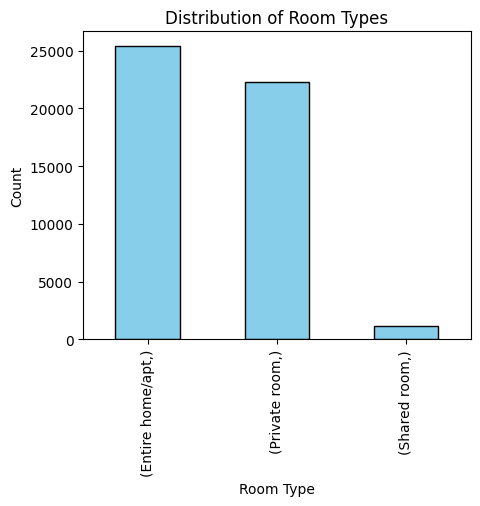

In [13]:
# Creating a bar plot to show the distribution of room types
room_type_counts = pd.DataFrame(data['room_type'])
room_type_counts=room_type_counts.value_counts()

plt.figure(figsize=(5, 4))
room_type_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Distribution of Room Types')

plt.show()

## We found that **Entire home/apt** is the highest number of room types overall

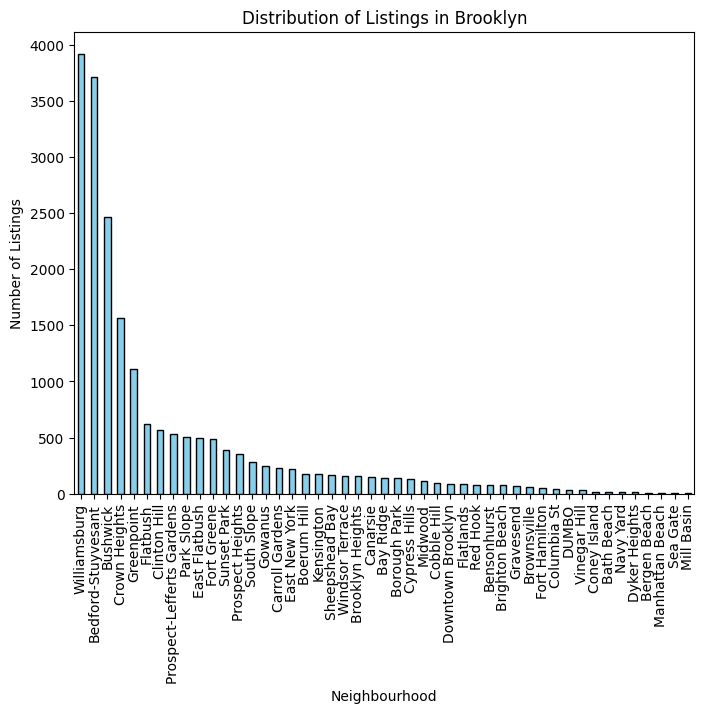

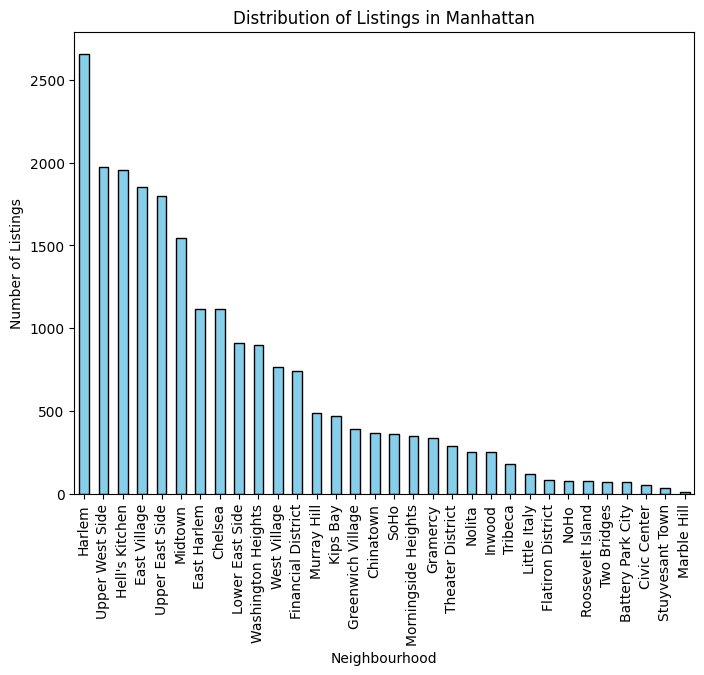

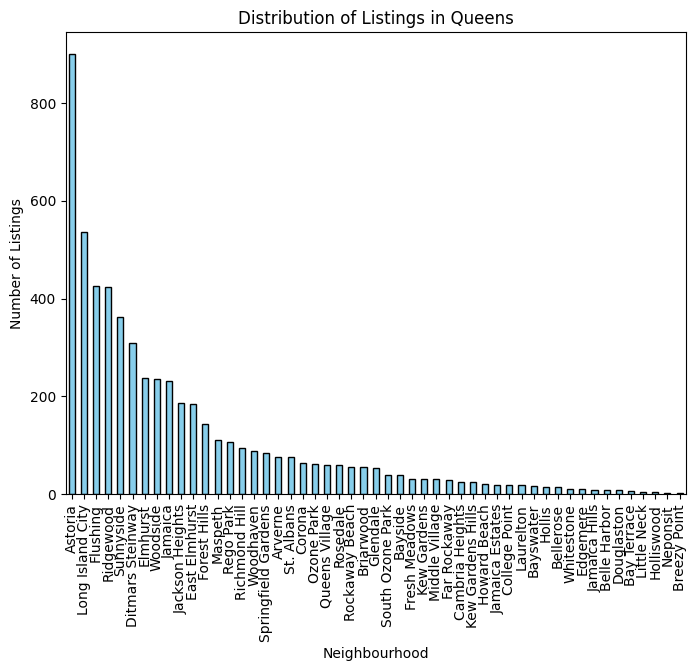

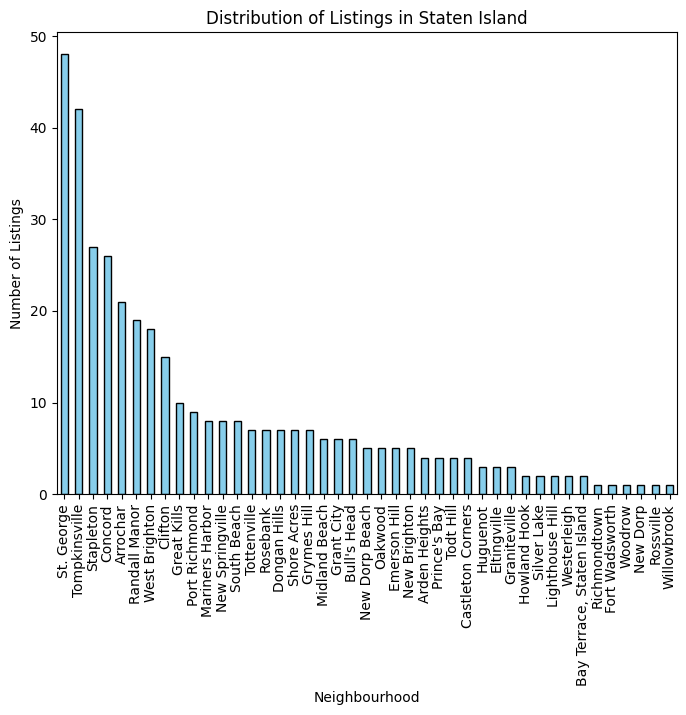

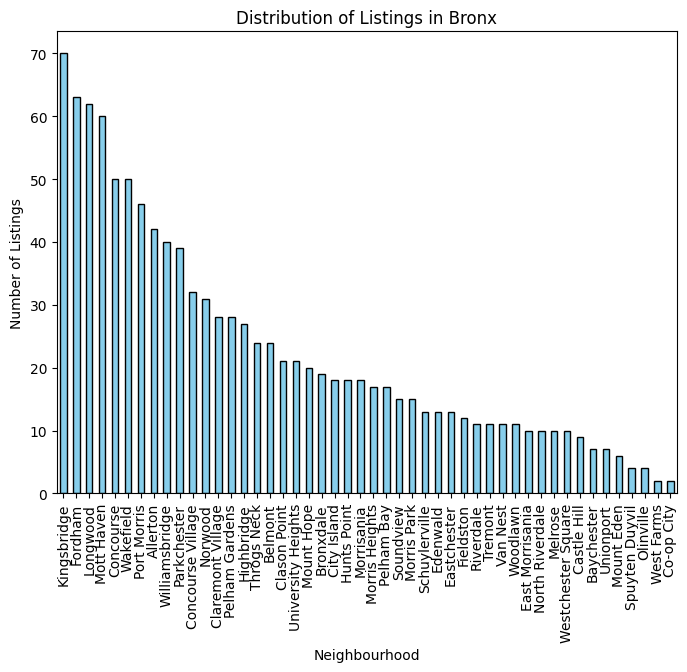

In [14]:
# Group the data by 'neighbourhood_group' and 'neighbourhood' and calculate value counts
grouped_neighbourhood_counts = data.groupby('neighbourhood_group')['neighbourhood'].value_counts()

# Get unique neighbourhood groups
neighbourhood_groups = data['neighbourhood_group'].unique()
neighbourhood_groups

# Iterate through each neighbourhood group and create distribution plots
for group in neighbourhood_groups:
    plt.figure(figsize=(8, 6))    
    df_group = data[data['neighbourhood_group'] == group]    
    neighbourhood_counts = df_group['neighbourhood'].value_counts()
    neighbourhood_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.xlabel('Neighbourhood')
    plt.ylabel('Number of Listings')
    plt.title(f'Distribution of Listings in {group}')   
    plt.show()

In [15]:
# Displaying the value counts of 'neighbourhood' column in the dataset
data['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [16]:
# Group data by 'neighbourhood_group' and 'room_type', find max price, and sort in descending order
room_price = data.groupby(['neighbourhood_group', 'room_type'])['price'].max().reset_index()
room_price_sorted = room_price.sort_values('price', ascending=False).head(10)
room_price_sorted

,neighbourhood_group,room_type,price
3,Brooklyn,Entire home/apt,10000
6,Manhattan,Entire home/apt,10000
10,Queens,Private room,10000
7,Manhattan,Private room,9999
4,Brooklyn,Private room,7500
12,Staten Island,Entire home/apt,5000
9,Queens,Entire home/apt,2600
1,Bronx,Private room,2500
11,Queens,Shared room,1800
0,Bronx,Entire home/apt,1000


#### Queens has a diverse range of listing types with high prices, including "Private room" for $10,000 and "Entire home/apt" for 2,600 USD and "Shared room" for 1800 USD	. 

In [17]:
# Group data by 'host_id', 'host_name', and 'room_type', find max number of reviews, and sort in descending order
most_reviewed_hosts = data.groupby(['host_id', 'host_name', 'room_type'])['number_of_reviews'].max().reset_index()
most_reviewed_hosts.sort_values(by='number_of_reviews', ascending=False).head(5)


,host_id,host_name,room_type,number_of_reviews
24484,47621202,Dona,Private room,629
7707,4734398,Jj,Private room,607
22213,37312959,Maya,Private room,543
4590,2369681,Carol,Private room,540
19443,26432133,Danielle,Private room,510


#### The top hosts with the most reviews have private rooms, and Dona is the highest-reviewed host with 629 reviews.

In [26]:
price_area

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9
...,...,...
669,7703,0
670,8000,1
671,8500,2
672,9999,6


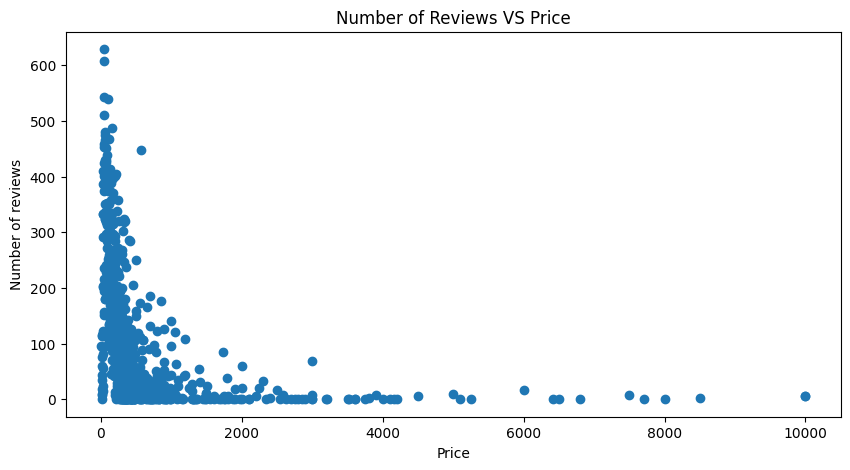

In [24]:
# Scatter Plot: Number of Reviews VS Price
price_area = data.groupby(['price'])['number_of_reviews'].max().reset_index()
price_area.head(10)

price_list = price_area['price']
review = price_area['number_of_reviews']
fig =plt.figure(figsize =(10,5))

plt.scatter(price_list, review)
plt.xlabel('Price')
plt.ylabel('Number of reviews')
plt.title('Number of Reviews VS Price')
plt.show()


### The highest-priced listings  tend to have a more limited market, leading to a lower number of reviews being submitted compared to lower-priced listings.

### Highest pricing Hosts (Top 10)

In [19]:
highest_pricing=data.groupby(['host_id','host_name','room_type','neighbourhood_group'])['price'].max().reset_index()
highest_pricing.sort_values(by='price',ascending=False).head(10)

,host_id,host_name,room_type,neighbourhood_group,price
27920,72390391,Jelena,Entire home/apt,Manhattan,10000
17060,20582832,Kathrine,Private room,Queens,10000
8055,5143901,Erin,Entire home/apt,Brooklyn,10000
7325,4382127,Matt,Entire home/apt,Manhattan,9999
2659,1235070,Olson,Entire home/apt,Manhattan,9999
6628,3906464,Amy,Private room,Manhattan,9999
16096,18128455,Rum,Entire home/apt,Manhattan,8500
2561,1177497,Jessica,Entire home/apt,Brooklyn,8000
33424,156158778,Sally,Entire home/apt,Manhattan,7703
10113,7407743,Jack,Entire home/apt,Manhattan,7500


### The highest-priced listings is a tie with in Manhattan,Queens and Brooklyn, with Jelena,Kathrine and Erin having the most expensive listings at $10,000 each.

## Neighbourhood having the most no.of days for minimum nights requirement

In [20]:
min_period=data.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
min_period.sort_values('minimum_nights',ascending=False).head(10)

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


### Manhattan has collectively the most no.of days for minimum nights requirement

# Room Types VS Room Counts

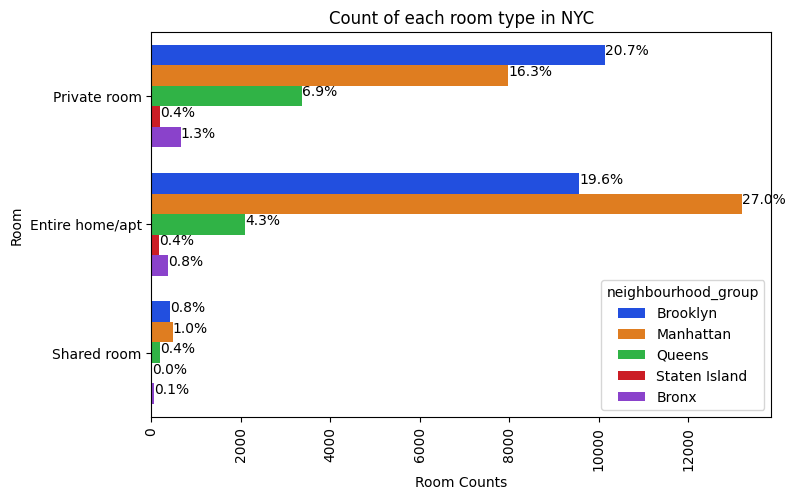

In [21]:
# Set the figure size for the plot
plt.rcParams['figure.figsize'] = (8, 5)

# Create a count plot of room types based on neighborhood groups
ax = sns.countplot(y='room_type', hue='neighbourhood_group', data=data, palette='bright')

# Calculate the total number of data points
total = len(data['room_type'])

# Annotate each bar with the percentage of total
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y))

# Set plot title, labels, and rotation
plt.title('Count of each room type in NYC')
plt.xlabel('Room Counts')
plt.xticks(rotation=90)
plt.ylabel('Room')
plt.show()


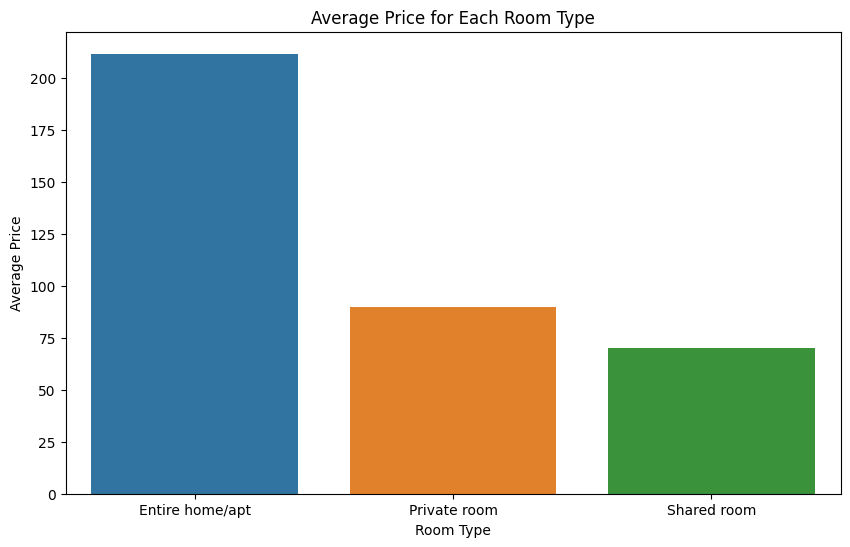

In [22]:
average_prices = data.groupby("room_type")["price"].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x="room_type", y="price", data=average_prices)
plt.xlabel("Room Type")
plt.ylabel("Average Price")
plt.title("Average Price for Each Room Type")
plt.show()

### The Entire home/apt has the highest average price compared to the other room types

## **Observations:**
1. Sonder(NYC) is the top host with the highest number of listings in Manhattan, closely followed by Blueground.

2. The most common room type overall is Entire home/apt, with higher prices observed in Brooklyn and Manhattan for this category.

3. The busiest hosts are Dona, Ji, Maya, Carol, and Danielle. Their preference for listing Entire home and Private room types aligns with the preferences of most guests, resulting in higher review ratings.

4. The analysis explored the correlation between different variables.

5. The top 10 hosts charging the highest prices are Jelena, Kathrine, Erin, Matt, Olson, Amy, Rum, Jessica, Sally, and Jack, with a maximum price of $10,000 USD.

6. Manhattan has the most listed properties with Entire home/apt, comprising around 27% of the total listings, followed by Brooklyn with approximately 19.6%. Private rooms are more prevalent in Brooklyn (20.7%) and Manhattan (16.3%), while Queens accounts for 6.9% of private room listings. This suggests that Brooklyn, Queens, and the Bronx offer more options for private room types, while Manhattan, with the highest number of listings in NYC, has a greater abundance of Entire home/apt room types.

## Key Takeaways for Hosts:
Neighborhood Insights: Understand neighborhood dynamics. Listings near popular attractions can command higher prices, while quieter areas may offer unique experiences.

1.Room Type Diversity: Consider offering different room types to attract a broader range of travelers. Private rooms appeal to budget-conscious guests, while entire homes/apartments attract families and groups.

2.Pricing Flexibility: Adjust pricing based on demand, events, and seasons. Competitive pricing can attract more bookings.

3.Continuous Improvement: Regularly update and refresh your listing. Offering great service can improve guest satisfaction.

4.Competition and Pricing: NYC's Airbnb market is competitive, and prices vary by neighborhood and room type. Hosts should research local trends to set competitive prices.

5.Location's Impact: Listings in prime areas are pricier. Hosts should consider central locations like Manhattan to attract more guests.

In conclusion hosts who leverage these insights to optimize their listings stand to benefit from increased guest engagement, positive reviews, and ultimately, improved financial returns. As the hospitality landscape continues to evolve, adapting to these trends and best practices will be essential for sustained success.

### Future Directions
As a potential next step, we could develop a predictive model capable of estimating prices based on the features like neighbourhood group and room type.